Setting up the environment

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.max_columns', None)
import os
import warnings
warnings.filterwarnings("ignore")

Import and prepare the data for the analysis

Each CSV file contains data for a specific month, and we need to read all the CSV files.

In [54]:
directory = '/Users/yuanyi/PycharmProjects/basics and data/projects/bike-share/divvy'

#List all CSV files in the directory: 
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]
print(csv_files)

dataframes = []

#read all the csv files and store them in a list， dataframes is list of dataframes
for file in csv_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

type(dataframes)

combined_df = pd.concat(dataframes, ignore_index=True)

['202208-divvy-tripdata.csv', '202303-divvy-tripdata.csv', '202210-divvy-tripdata.csv', '202305-divvy-tripdata.csv', '202306-divvy-tripdata.csv', '202211-divvy-tripdata.csv', '202304-divvy-tripdata.csv', '202312-divvy-tripdata.csv', '202302-divvy-tripdata.csv', '202207-divvy-tripdata.csv', '202209-divvy-publictripdata.csv', '202301-divvy-tripdata.csv']


Explore the data and handle time series data

In [55]:
combined_df.shape
combined_df.dtypes
combined_df.columns
combined_df.head(10)

#remove the missing values
data=combined_df.dropna()

data.info()
data.shape

# Convert 'started_at' and 'ended_at' to datetime 处理日期时间
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

data['date'] = data['started_at']

print(data['date'].dtypes)

<class 'pandas.core.frame.DataFrame'>
Index: 4440829 entries, 142 to 5821710
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 474.3+ MB
datetime64[ns]


Process & Analyze

The number of rides casual riders and members take daily throughout the week.会员和非会员一周每一天rides的数量有什么不同

In [56]:

#get the weekdays to find the pattern of engagement based on the days of the week.找到星期几
data['weekday'] = data['date'].dt.strftime('%A')

#classify the data into casual users and member users 把数据分出会员和非会员的
member = data[data['member_casual'] == 'member']
common = data[data['member_casual'] == 'casual']
print(member.head())
print(common.head())

grouped_data = data.groupby(['weekday', 'member_casual']).size().unstack(fill_value=0)

# Reorder weekdays for sorting
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


                ride_id  rideable_type          started_at  \
4226   EB7445C77D90CAEE  electric_bike 2022-08-26 09:48:07   
6078   53CD4901FB5C680B  electric_bike 2022-08-12 18:03:43   
6175   CA7EE9EC75803128  electric_bike 2022-08-12 14:23:16   
6194   C647A15ACCB3ECA6  electric_bike 2022-08-21 15:28:05   
10067  B943DD0CF265C29F  electric_bike 2022-08-06 14:42:59   

                 ended_at              start_station_name start_station_id  \
4226  2022-08-26 10:01:20  California Ave & Milwaukee Ave            13084   
6078  2022-08-12 18:15:29            Kenosha & Wellington              361   
6175  2022-08-12 14:39:46           Wood St & Chicago Ave              637   
6194  2022-08-21 16:01:38     Cottage Grove Ave & 51st St     TA1309000067   
10067 2022-08-06 14:58:07           Wood St & Chicago Ave              637   

                     end_station_name end_station_id  start_lat  start_lng  \
4226          Western Ave & Roscoe St          15634  41.922726 -87.697207   
60

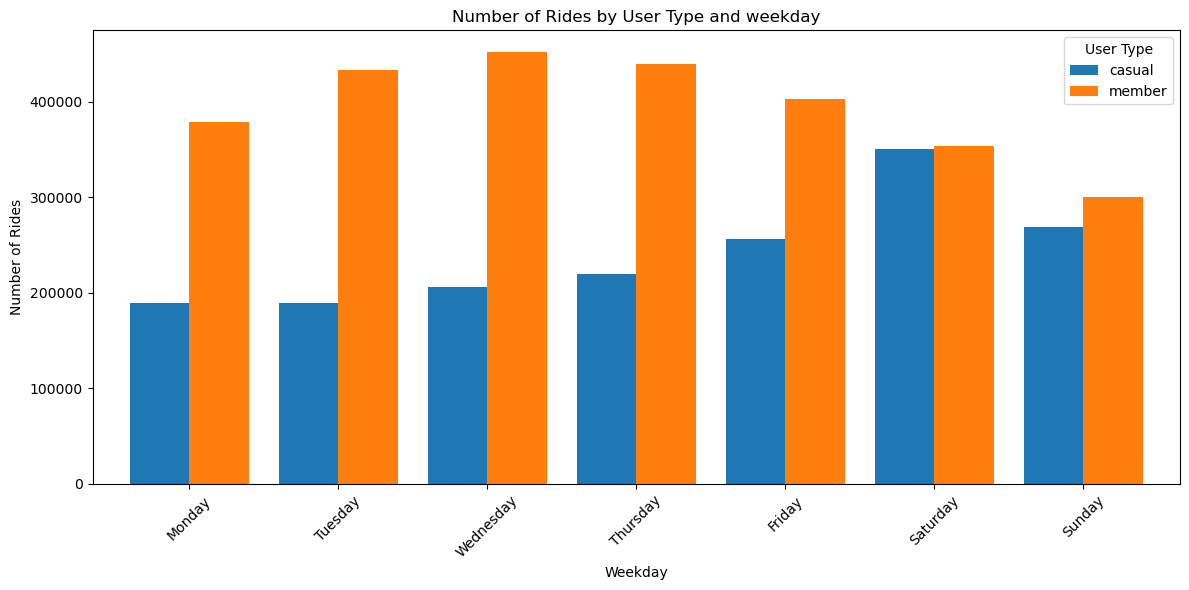

In [28]:
# Plotting the grouped bar plot
grouped_data.reindex(weekday_order).plot(kind='bar', figsize=(12, 6), width=0.8)

plt.xlabel('Weekday')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by User Type and weekday')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.tight_layout()
plt.show()

In [57]:
# Define a function to categorize weekdays and weekends
def categorize_day(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

type(data['weekday'])
data['day_type'] = data['weekday'].apply(categorize_day)
#data['day_type'] = categorize_day(data['weekday']) will result in error
print(data.head())

              ride_id  rideable_type          started_at            ended_at  \
142  241C440C74CB31BB   classic_bike 2022-08-05 16:13:36 2022-08-05 16:22:40   
271  53A7590B28ED25E2   classic_bike 2022-08-11 23:30:11 2022-08-11 23:30:56   
329  C34EE790A58C0434   classic_bike 2022-08-21 14:09:08 2022-08-21 15:10:46   
357  49259B4BA064D81B  electric_bike 2022-08-21 16:15:12 2022-08-21 16:29:30   
422  BEE91D557E47FE83   classic_bike 2022-08-21 02:11:26 2022-08-21 03:44:04   

                 start_station_name start_station_id  \
142                  DuSable Museum     KA1503000075   
271  California Ave & Milwaukee Ave            13084   
329    California Ave & Division St            13256   
357           Wood St & Chicago Ave              637   
422  California Ave & Milwaukee Ave            13084   

                   end_station_name end_station_id  start_lat  start_lng  \
142     Cottage Grove Ave & 51st St   TA1309000067  41.791568 -87.607852   
271  California Ave & Milwauke

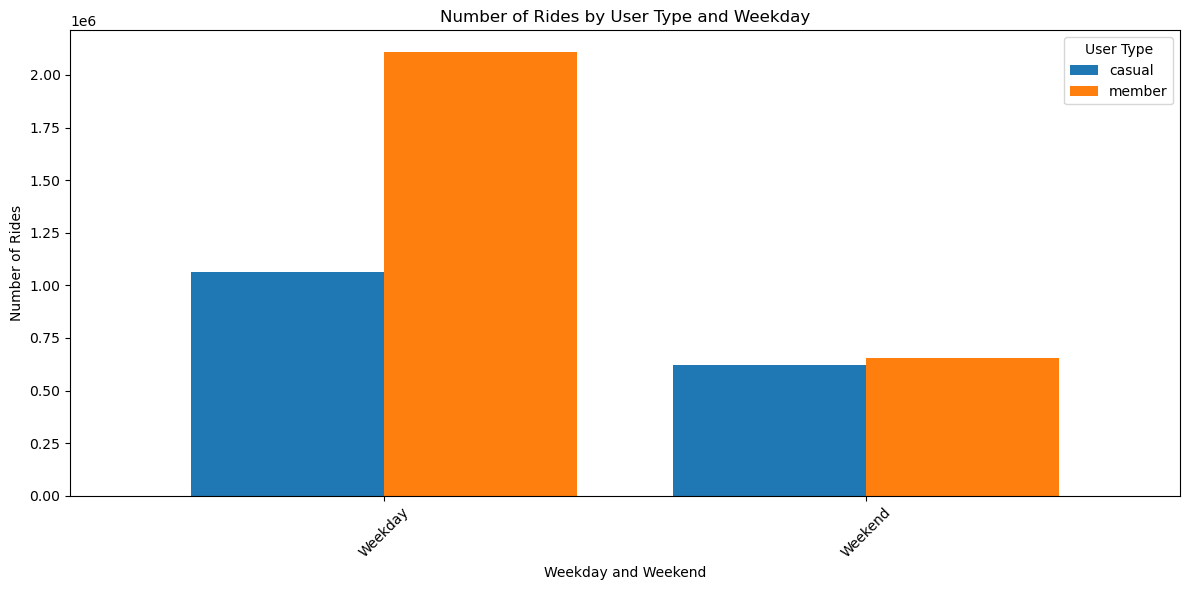

In [30]:

day_data = data.groupby(['day_type', 'member_casual']).size().unstack(fill_value=0)

day_data.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.xlabel('Weekday and Weekend')
plt.ylabel('Number of Rides')
plt.title('Number of Rides by User Type and Weekday')
plt.xticks(rotation=45)
plt.legend(title='User Type')
plt.tight_layout()
plt.show()

On weekdays, there are significantly more members than casual customers, but the numbers are similar on weekends.
casual用户周末骑得多，所以可以推出周末有折扣的会员套餐。
The company may offer discounts on weekends to casual users who purchase an annual membership. Additionally, the company may introduce weekend passes to encourage local users to buy an annual membership. 

In [61]:
#pattern in the types of bikes that casual riders and members prefer.

bike_data = data.groupby(['rideable_type', 'member_casual']).size().unstack(fill_value=0)
print(bike_data.head())

member_casual  casual   member
rideable_type                 
classic_bike   809608  1713431
docked_bike    136986        0
electric_bike  734220  1046584


In [65]:
# examine the “ride length” in terms of the duration they typically ride. 骑行的时间

data['ride_time'] = data['ended_at'] - data['started_at']
print(data['ride_time'].head())
mean_duration = data.groupby(['member_casual'])['ride_time'].mean()
print(mean_duration)
#I found that the average ride length of casual riders is much longer than that of members.



142   0 days 00:09:04
271   0 days 00:00:45
329   0 days 01:01:38
357   0 days 00:14:18
422   0 days 01:32:38
Name: ride_time, dtype: timedelta64[ns]
member_casual
casual   0 days 00:22:30.542535937
member   0 days 00:12:06.661006914
Name: ride_time, dtype: timedelta64[ns]


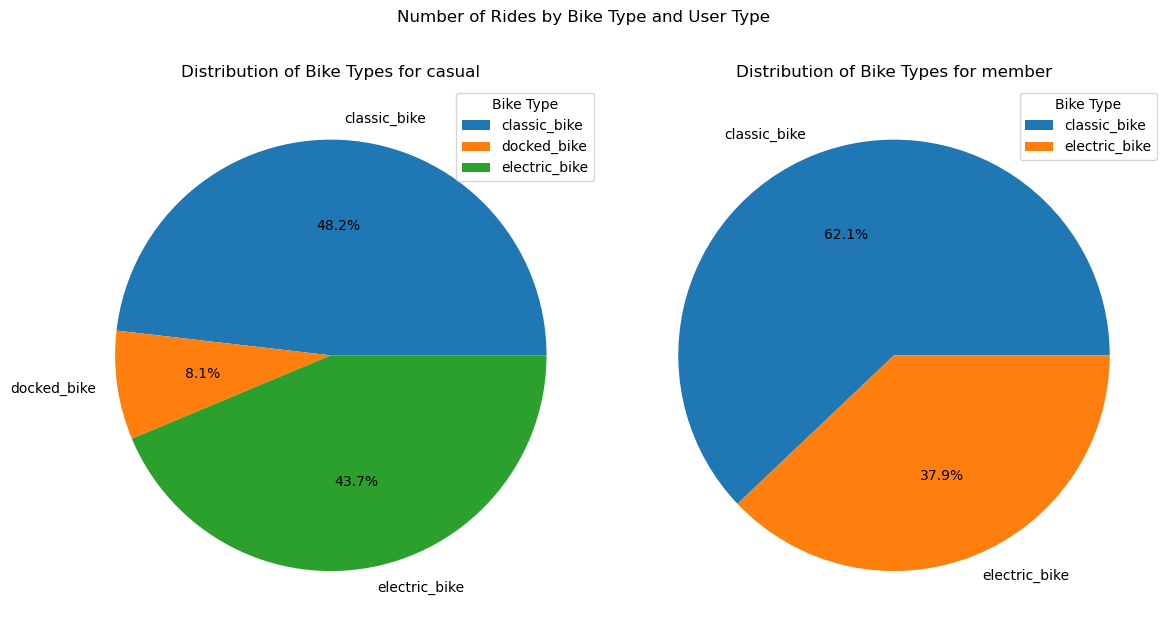

In [34]:
# Plotting the pie chart with subplots
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Iterate through each subplot and set title
for ax, column in zip(axes, bike_data.columns):
    # Filter out bike types with zero counts
    data_to_plot = bike_data[column][bike_data[column] > 0]

    data_to_plot.plot(kind='pie', ax=ax, autopct='%1.1f%%')
    ax.set_ylabel('')
    ax.set_title(f'Distribution of Bike Types for {column}')
    ax.legend(title='Bike Type', loc='upper right')

plt.suptitle('Number of Rides by Bike Type and User Type', y=1.05)
plt.tight_layout()
plt.show()


In [ ]:
The preference between bike types for casual users and members is not clearly evident.

In [67]:
#peak hours by casual riders and members. 高峰时间段
#the started_at should be the datetime object
print(data['started_at'].dtypes)

# Extract the hour component
data['hour'] = data['started_at'].dt.hour
print(data.head())

datetime64[ns]
              ride_id  rideable_type          started_at            ended_at  \
142  241C440C74CB31BB   classic_bike 2022-08-05 16:13:36 2022-08-05 16:22:40   
271  53A7590B28ED25E2   classic_bike 2022-08-11 23:30:11 2022-08-11 23:30:56   
329  C34EE790A58C0434   classic_bike 2022-08-21 14:09:08 2022-08-21 15:10:46   
357  49259B4BA064D81B  electric_bike 2022-08-21 16:15:12 2022-08-21 16:29:30   
422  BEE91D557E47FE83   classic_bike 2022-08-21 02:11:26 2022-08-21 03:44:04   

                 start_station_name start_station_id  \
142                  DuSable Museum     KA1503000075   
271  California Ave & Milwaukee Ave            13084   
329    California Ave & Division St            13256   
357           Wood St & Chicago Ave              637   
422  California Ave & Milwaukee Ave            13084   

                   end_station_name end_station_id  start_lat  start_lng  \
142     Cottage Grove Ave & 51st St   TA1309000067  41.791568 -87.607852   
271  California

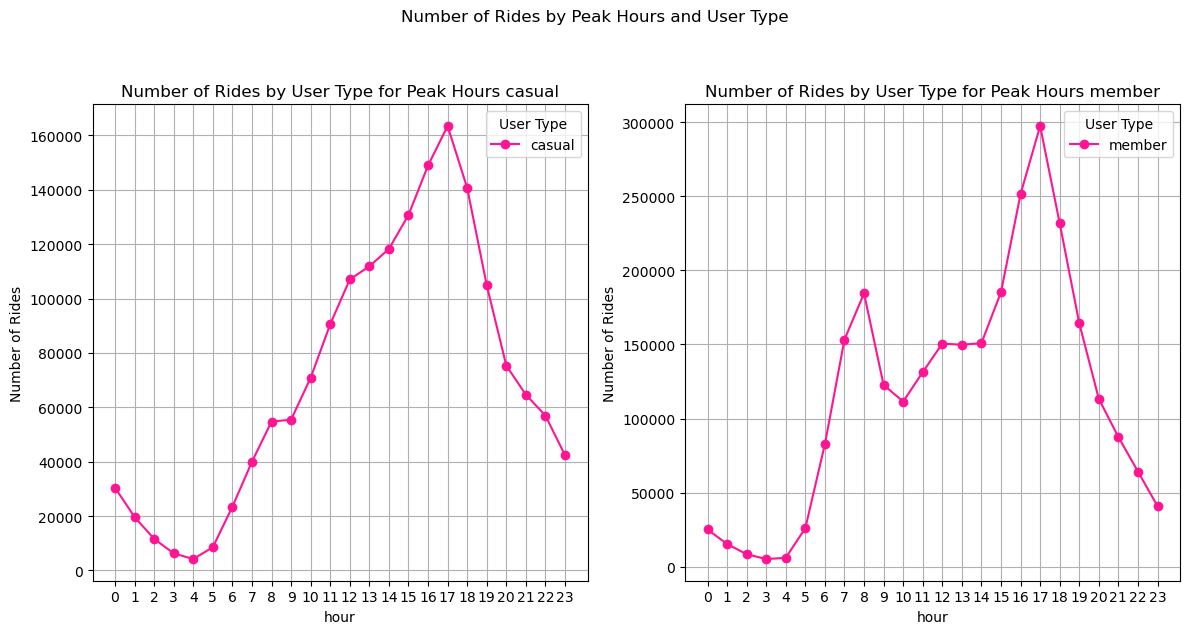

In [69]:
peak_hours = data.groupby(['hour', 'member_casual']).size().unstack(fill_value=0)
#Plotting the line chart with subplots

# Plotting the line chart with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Iterate through each subplot and plot the line chart
for ax, column in zip(axes, peak_hours.columns):
    peak_hours[column].plot(kind='line', ax=ax, marker='o', color='deeppink')
    ax.set_ylabel('Number of Rides')
    ax.set_title(f'Number of Rides by User Type for Peak Hours {column}')
    ax.legend(title='User Type', loc='upper right')
    ax.grid(True)  # Add grid to the background
    ax.set_xticks(range(0, 24))  # Set x-ticks for each hour

plt.suptitle('Number of Rides by Peak Hours and User Type', y=1.05)
plt.tight_layout()
plt.show()


In [ ]:
The peak hours for both casual riders and members follow a similar pattern. 
To address potential bike availability issues for casual riders during these times, we can encourage them to consider purchasing an annual membership. 
This is because the company prioritizes members in a bike shortage.

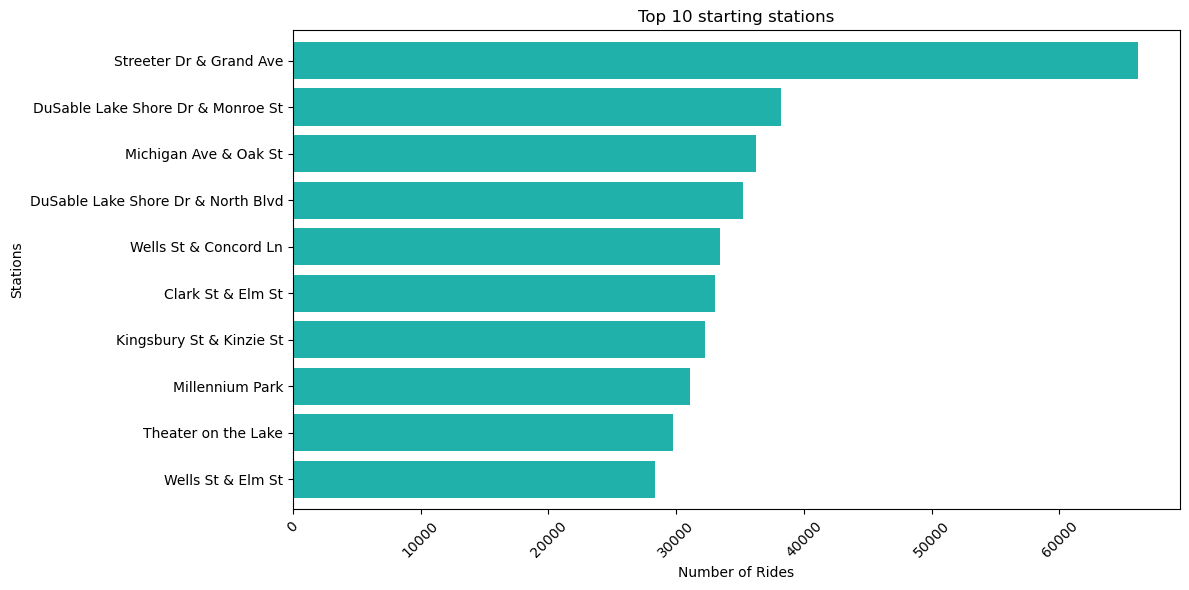

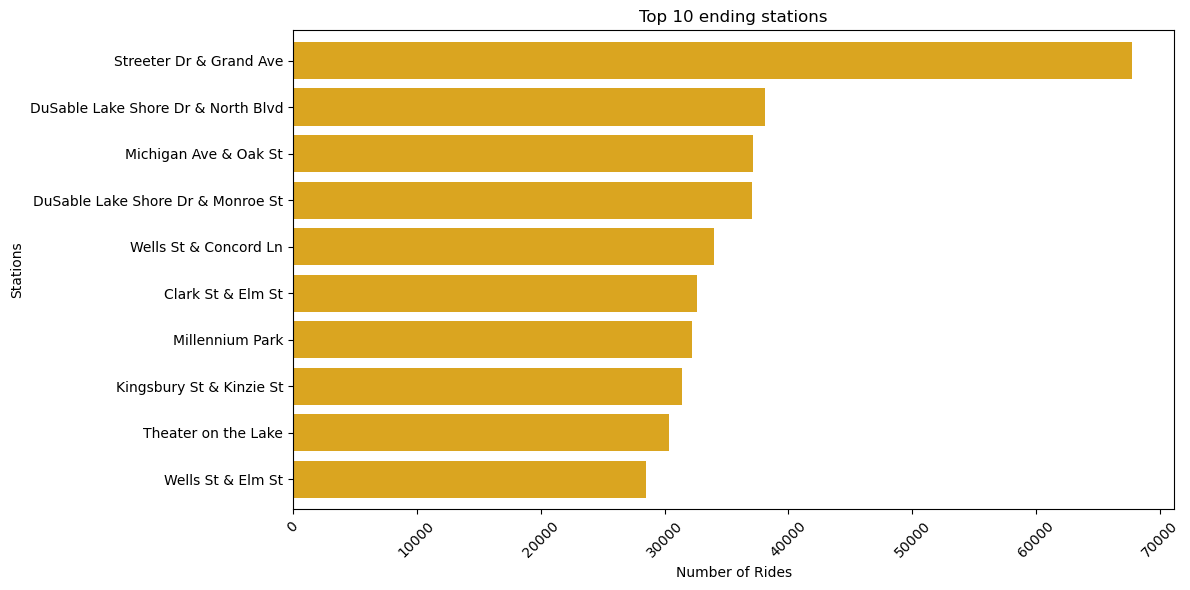

In [73]:
#top 10 starting stations and ending stations
sta_stations = data.groupby(['start_station_name']).size()
largest_sta = sta_stations.nlargest(10)
largest_sta = largest_sta.sort_values(ascending=True) #从小到大排列

largest_sta.plot(kind='barh', figsize=(12, 6), width=0.8,color='lightseagreen')
plt.xlabel('Number of Rides')
plt.ylabel('Stations')
plt.title('Top 10 starting stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

end_stations= data.groupby(['end_station_name']).size()
largest_end = end_stations.nlargest(10)
largest_end = largest_end.sort_values(ascending=True)

largest_end.plot(kind='barh', figsize=(12, 6), width=0.8,color='goldenrod')
plt.xlabel('Number of Rides')
plt.ylabel('Stations')

plt.title('Top 10 ending stations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We can execute targeted marketing campaigns around these top stations to further increase engagement. Additionally, we can introduce station-specific enhancements during peak hours, such as offering additional amenities, hosting events, or running promotions.